In [23]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_game(n_friends, n_turns=1000, dice_faces=6):
    shots_matrix = np.zeros((n_turns, n_friends), dtype=int)
    glasses = np.zeros(dice_faces)  # 0 indicates empty, 1 indicates full
    
    for turn in range(n_turns):
        for friend in range(n_friends):
            turn_shots = 0
            roll = np.random.randint(0, dice_faces)  # Dice roll (0 to 5)
            while glasses[roll] == 1:  # While the glass is full
                turn_shots += 1
                glasses[roll] = 0  # Drink the glass
                roll = np.random.randint(1, 7) - 1  # Roll again
            glasses[roll] = 1  # Fill the empty glass and end turn
            
            shots_matrix[turn, friend] = turn_shots

    return shots_matrix


In [24]:
# 10 rounds and 10 friends games example 
print(simulate_game(10,10))

[[0 0 0 1 0 0 2 3 0 2]
 [0 0 0 1 2 1 1 0 0 3]
 [1 1 1 1 0 2 0 1 2 2]
 [0 2 1 0 0 1 0 4 1 2]
 [1 0 1 1 0 1 0 3 1 0]
 [0 0 1 4 1 3 0 0 0 1]
 [1 0 2 1 1 2 0 0 1 2]
 [2 0 2 1 1 0 0 4 0 0]
 [1 2 1 1 2 0 0 0 2 1]
 [0 2 2 0 2 0 3 1 0 1]]


In [25]:
def plot_individual_histograms(shots_matrix_high, shots_matrix_low, n_friends):
    fig, axs = plt.subplots(n_friends, 2, figsize=(15, 5 * n_friends), sharex=True)
    bins = np.arange(0, 8) - 0.5  # Bins for histogram

    for friend in range(n_friends):
        # High number of rounds
        friend_shots_high = shots_matrix_high[:, friend]
        counts_high, _, _ = axs[friend, 0].hist(friend_shots_high, bins=bins, edgecolor='black', alpha=0.75)
        mean_high = np.mean(friend_shots_high)
        std_dev_high = np.std(friend_shots_high)
        counts_percentage_high = (counts_high / len(friend_shots_high)) * 100  # Convert counts to percentages
        for i in range(len(counts_high)):
            axs[friend, 0].text(i, counts_high[i] + 0.5, f'{counts_percentage_high[i]:.1f}%', ha='center')
        axs[friend, 0].set_title(f'High Rounds - Friend {friend + 1}\nMean: {mean_high:.2f}, SD: {std_dev_high:.2f}')
        axs[friend, 0].set_xlabel('Number of Shots')
        axs[friend, 0].set_ylabel('Frequency')
        axs[friend, 0].set_xticks(range(7))
        axs[friend, 0].set_xlim(-0.5, 6.5)
        axs[friend, 0].set_ylim(0, max(counts_high) * 1.1)

        # Low number of rounds
        friend_shots_low = shots_matrix_low[:, friend]
        counts_low, _, _ = axs[friend, 1].hist(friend_shots_low, bins=bins, edgecolor='black', alpha=0.75)
        mean_low = np.mean(friend_shots_low)
        std_dev_low = np.std(friend_shots_low)
        counts_percentage_low = (counts_low / len(friend_shots_low)) * 100  # Convert counts to percentages
        for i in range(len(counts_low)):
            axs[friend, 1].text(i, counts_low[i] + 0.5, f'{counts_percentage_low[i]:.1f}%', ha='center')
        axs[friend, 1].set_title(f'Low Rounds - Friend {friend + 1}\nMean: {mean_low:.2f}, SD: {std_dev_low:.2f}')
        axs[friend, 1].set_xlabel('Number of Shots')
        axs[friend, 1].set_ylabel('Frequency')
        axs[friend, 1].set_xticks(range(7))
        axs[friend, 1].set_xlim(-0.5, 6.5)
        axs[friend, 1].set_ylim(0, max(counts_low) * 1.1)
    
    plt.tight_layout()
    plt.show()

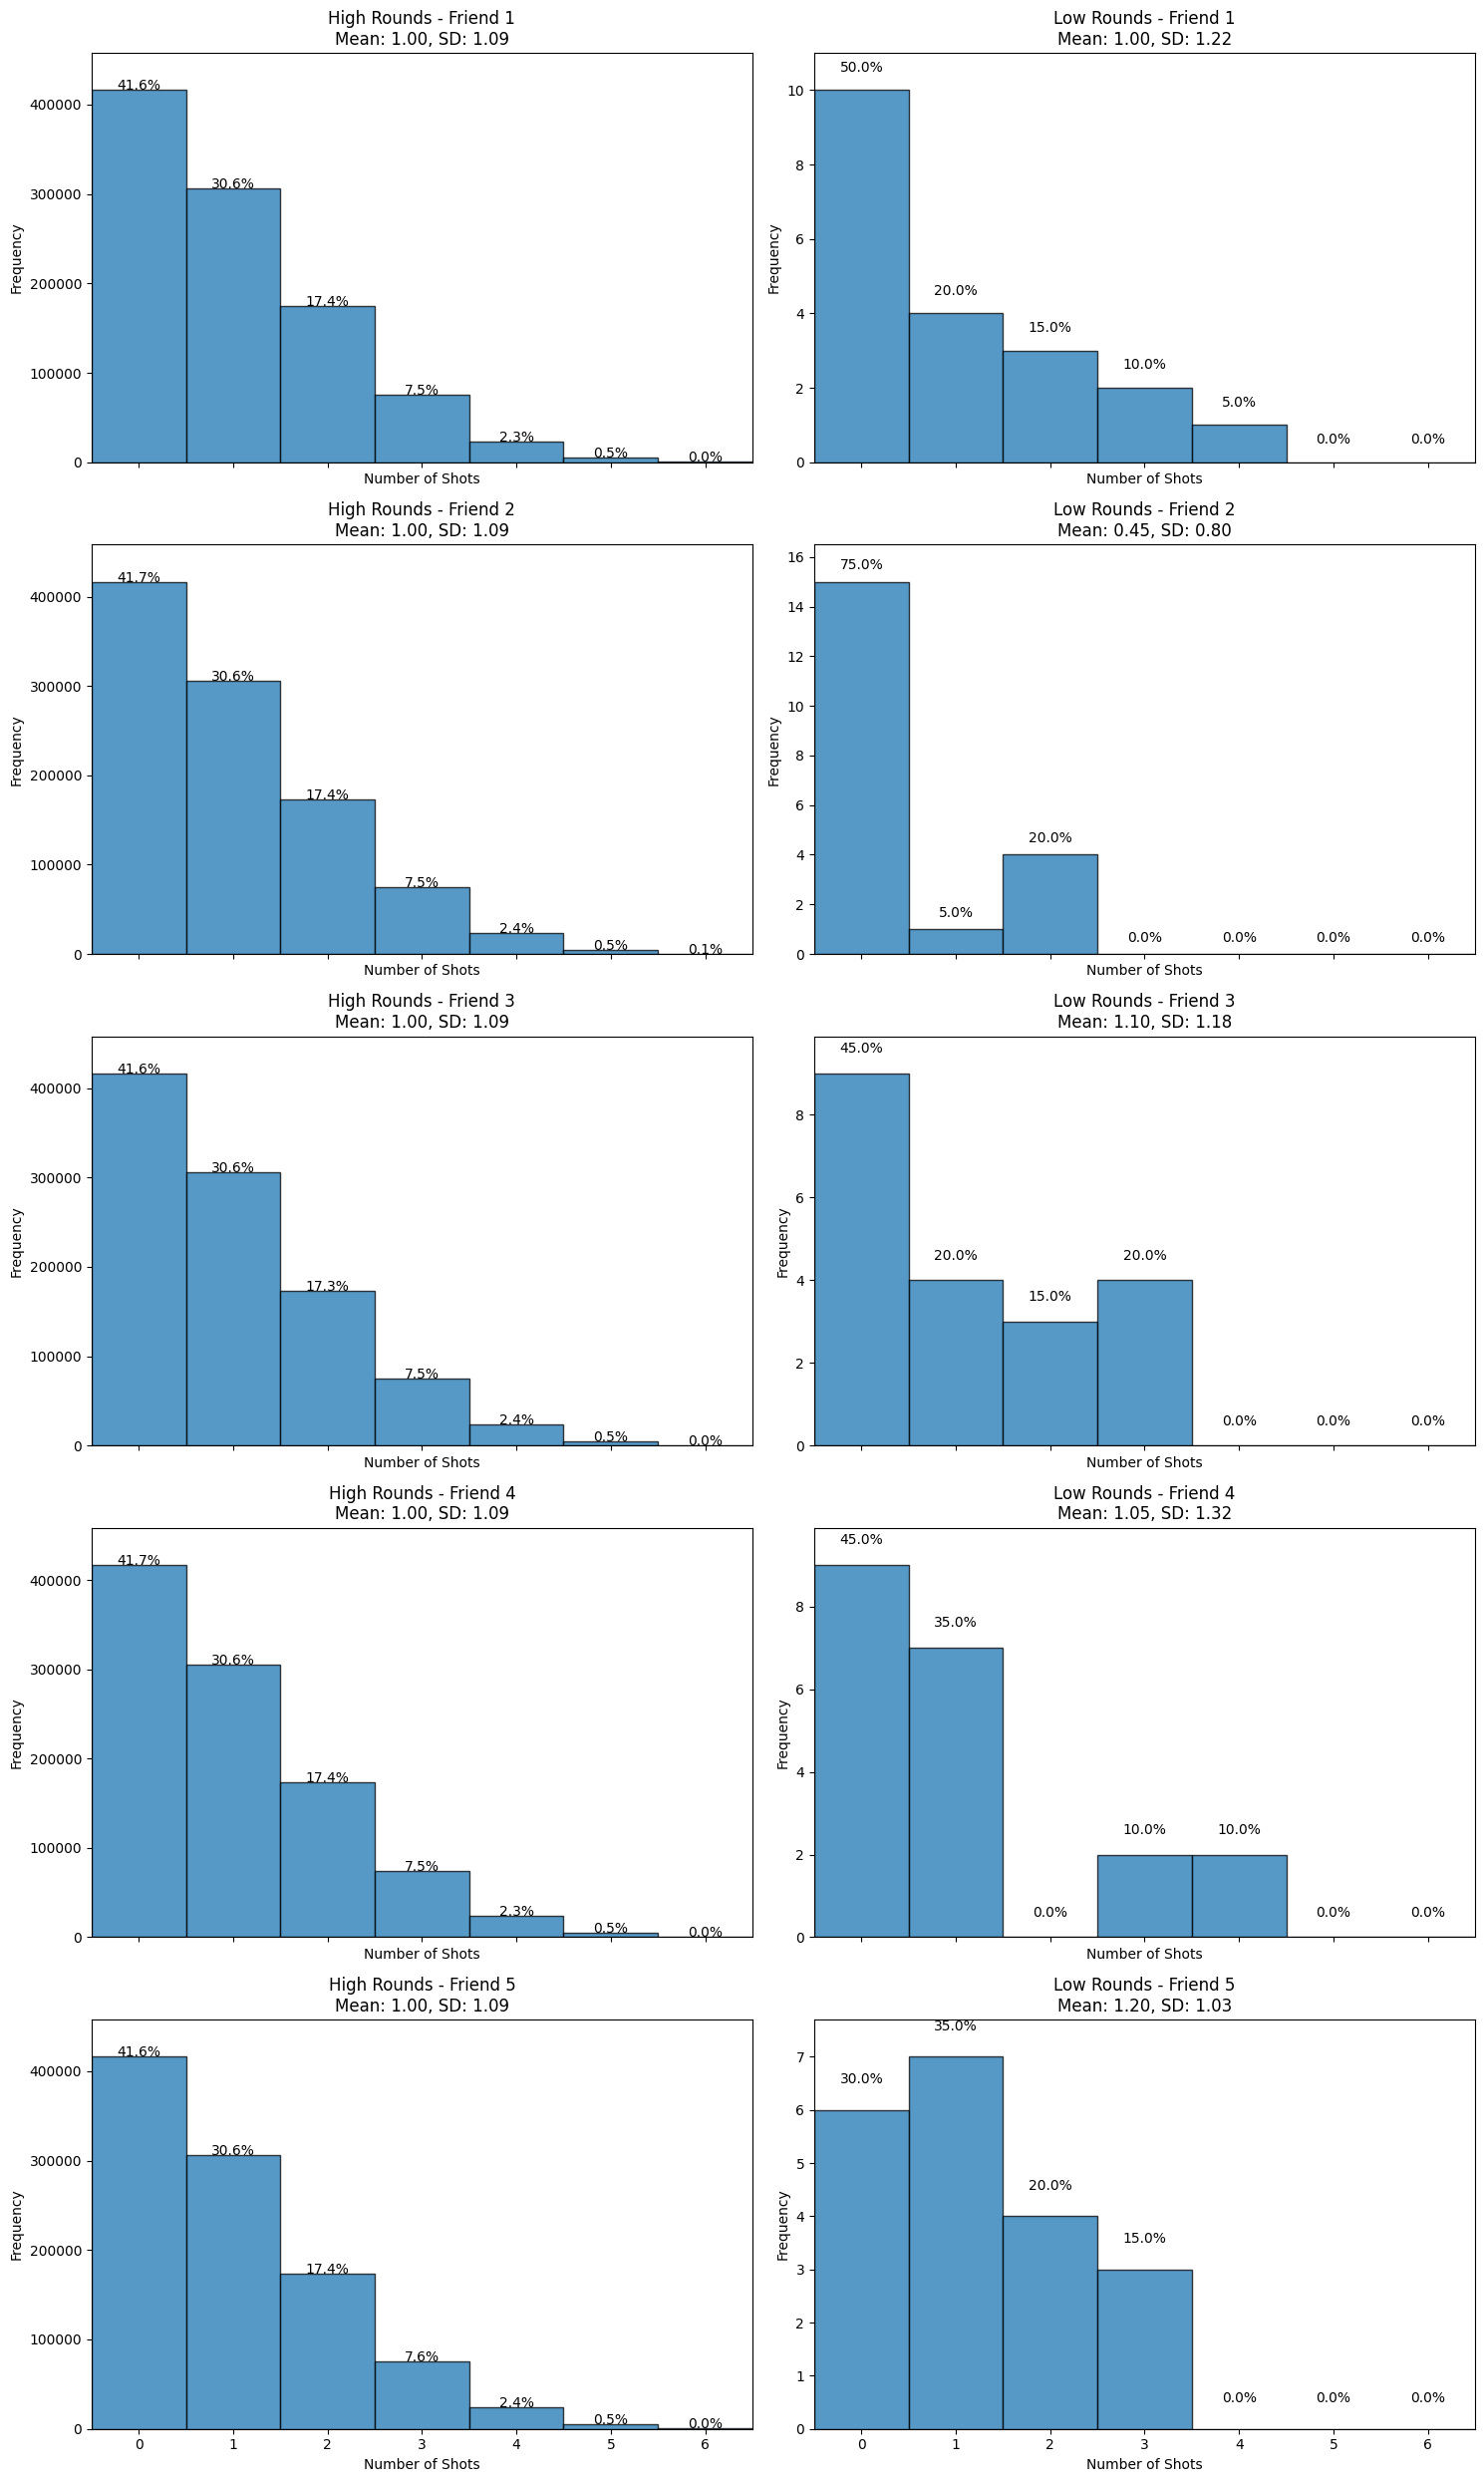

In [26]:
# Simulate the game for 5 friends with a high number of rounds and a low number of rounds
n_friends = 5
shots_matrix_high = simulate_game(n_friends, 1000000)
shots_matrix_low = simulate_game(n_friends, 20)

# Plot individual histograms for both high and low rounds
plot_individual_histograms(shots_matrix_high, shots_matrix_low, n_friends)

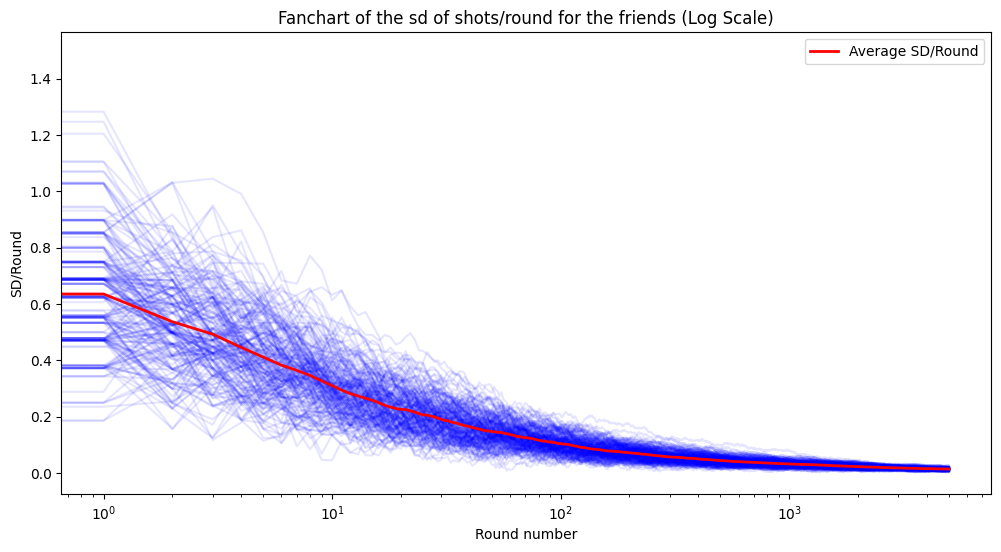

In [27]:
# Calculate the SD/round without the first 7 rounds
def calculate_sd_per_round(n_friends, n_turns):
    shots_matrix = simulate_game(n_friends, n_turns)
    cumulative_shots = np.cumsum(shots_matrix, axis=0)
    round_numbers = np.arange(1, n_turns + 1).reshape(-1, 1)
    cumulative_shots_per_round = cumulative_shots / round_numbers
    std_devs = np.std(cumulative_shots_per_round, axis=1)
    return std_devs

# Parameters
n_friends = 6
n_turns = 5000
n_simulations = 200

# Perform simulations
all_sd_per_round = np.zeros((n_simulations, n_turns))

for i in range(n_simulations):
    all_sd_per_round[i, :] = calculate_sd_per_round(n_friends, n_turns)

# Calculate the average SD/round over all simulations
average_sd_per_round = np.mean(all_sd_per_round, axis=0)

# Plot the fanchart with a log scale
plt.figure(figsize=(12, 6))
for i in range(n_simulations):
    plt.plot(all_sd_per_round[i, :], color='blue', alpha=0.1)  # Individual simulations
plt.plot(average_sd_per_round, color='red', linewidth=2, label='Average SD/Round')
plt.xlabel('Number of rounds')
plt.ylabel('SD/Round')
plt.title('Fanchart of the sd of shots/round for the friends (Log Scale)')
plt.xscale('log')
plt.legend()
plt.show()

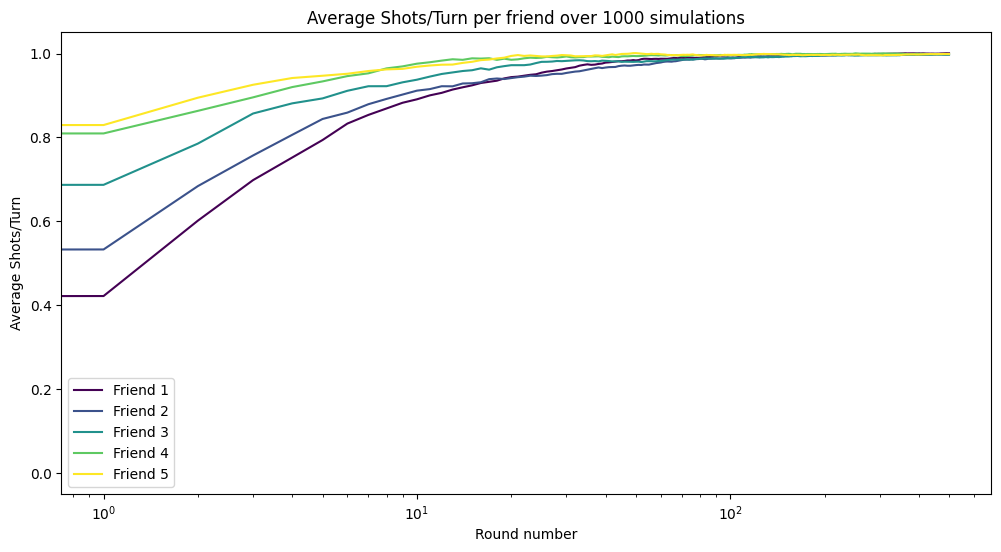

In [28]:
# Who drinks more?
# Parameters
n_friends = 5
n_turns = 500
n_simulations = 1000

# Perform simulations
all_mean_shots_per_round = np.zeros((n_simulations, n_turns, n_friends))

for i in range(n_simulations):
    shots_matrix = simulate_game(n_friends, n_turns)
    mean_shots_per_round = np.cumsum(shots_matrix, axis=0) / np.arange(1, n_turns + 1).reshape(-1, 1)
    all_mean_shots_per_round[i, :, :] = mean_shots_per_round

# Calculate the average mean shots/turn over all simulations
average_mean_shots_per_round = np.mean(all_mean_shots_per_round, axis=0)

# Plot the mean shots/turn for each friend
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, n_friends))  # Generate a range of colors

for friend in range(n_friends):
    plt.plot(average_mean_shots_per_round[:, friend], label=f'Friend {friend + 1}', color=colors[friend])

plt.xlabel('Number of rounds')
plt.ylabel('Average Shots/Turn')
plt.title(f'Average Shots/Turn per friend over {n_simulations} simulations')
plt.xscale('log')
plt.legend()
plt.show()
